In [2]:
#Damián Guadalupe Tijerina Peña
#A00827880

# 1.- Introducción

Frecuentemente, entre el fútbol, se es buscado observar la forma de los juegos desde un punto de vista estadístico. A partes como a los clubes, directores técnicos e incluso personas que se dedican a realizar apuestas deportivas les interesa estar actualizadandose constantemente sobre la información recabada de una cierta liga, de este modo se puede partir a realizar distintos estudios, relaciones y conclusiones que ayuden a perseguir y conseguir los objetivos de la parte interesada. 

Estos objetivos dependen mucho de la forma de negocio que sea manejada, no se puede decir que un club y su director técnico utilizan a los datos de la misma manera que un apostador. Aunque puede haber similitudes entre la forma en que son tratados los datos, las variables que se utilizan, modelos y conclusiones es importante desde un inicio tener un objetivo predefinido que funja como guía para análisis determinados. 

En esta investigación se tomará el punto de vista de la directiva de un club que desea conocer a los equipos con un mejor rendimiento en cuánto a goles refiere. De esta manera, determinar cuáles son las características de los equipos más goleadores en la liga y así poder tomar una decisión en cuánto al estilo de juego del próximo director técnico para tener buenos resultados tanto deportivos como económicos. 

Es por ello que se utilizará una base de datos con estadísticas de los jugadores de la Liga Premier de Inglaterra en la temporada 2020-2021. En esta se puede encontrar información como el nombre del jugador, club al que partenece, nacionalidad, posición, edad, goles, asistencias, pases intentados, entre muchas otras, que servirán para completar la investigación. 

# 2.- Variables críticas

Para iniciar se realizará una exploración de la información que la base de datos contiene, conocer las variables que se encuentran, determinar aquellas que sean críticas e importantes de acuerdo al objetivo de la investigación así como su comportamiento y relación con las demás variables significativas.

2.1 Lectura de base de datos

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px



df=pd.read_csv('datasets/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [5]:
df.shape

(532, 18)

In [6]:
df.dtypes

Name                      object
Club                      object
Nationality               object
Position                  object
Age                        int64
Matches                    int64
Starts                     int64
Mins                       int64
Goals                      int64
Assists                    int64
Passes_Attempted           int64
Perc_Passes_Completed    float64
Penalty_Goals              int64
Penalty_Attempted          int64
xG                       float64
xA                       float64
Yellow_Cards               int64
Red_Cards                  int64
dtype: object

2.2 Determinación de variables críticas

Retomando el objetivo planteado en la introducción, se desea conocer el rendimiento por club, es decir que la variable de los jugadores no es un factor que se vaya a considerar a lo largo de los estudios. Como primer filtro se eliminará de lo que denominaremos "variables críticas" al atributo que contiene el nombre del jugador. En cuanto a las variables categóricas la nacionalidad de los jugadores no es una cualidad que se considere relevante para el caso de estudio ya que se desea conocer el rendimiento deportivo de los clubes como un conjunto. Cuestiones como la nacionalidad pueden entrar en cuestión en situaciones en las que se desee estudiar la composición de un conjunto por invidual.

Siguiendo esta línea como variables categóricas serán consideradas el club y la posición.

Como segundo filtro se tomará en cuenta los resultados de un análisis de correlación entre las variables numéricas para observar las dependencias y los posibles efectos que puedan tener entre sí.

In [7]:
variables_numericas=['Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards']
df[variables_numericas].corr()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Age,1.000000,0.149628,0.156387,0.158643,0.047022,0.026740,0.120244,0.122812,0.084547,0.083328,-0.056098,-0.047849,0.115191,0.065414
Matches,0.149628,1.000000,0.938116,0.947351,0.441977,0.508009,0.785362,0.085462,0.227929,0.234389,0.192047,0.227570,0.578093,0.168281
Starts,0.156387,0.938116,1.000000,0.997031,0.405381,0.477704,0.853448,0.086039,0.216877,0.221418,0.072487,0.113446,0.603497,0.195383
Mins,0.158643,0.947351,0.997031,1.000000,0.400398,0.474677,0.855600,0.085460,0.219027,0.224115,0.075016,0.117602,0.604634,0.193038
Goals,0.047022,0.441977,0.405381,0.400398,1.000000,0.617831,0.201526,-0.025137,0.594730,0.590492,0.681959,0.348428,0.104413,0.057785
Assists,0.026740,0.508009,0.477704,0.474677,0.617831,1.000000,0.393906,-0.016645,0.408459,0.411784,0.383358,0.558677,0.213691,-0.020855
Passes_Attempted,0.120244,0.785362,0.853448,0.855600,0.201526,0.393906,1.000000,0.228393,0.149533,0.157020,-0.092535,0.105132,0.634567,0.208003
Perc_Passes_Completed,0.122812,0.085462,0.086039,0.085460,-0.025137,-0.016645,0.228393,1.000000,-0.024517,-0.014934,-0.035313,0.047720,0.162451,0.054068
Penalty_Goals,0.084547,0.227929,0.216877,0.219027,0.594730,0.408459,0.149533,-0.024517,1.000000,0.982176,0.407251,0.205417,0.057846,0.021109
Penalty_Attempted,0.083328,0.234389,0.221418,0.224115,0.590492,0.411784,0.157020,-0.014934,0.982176,1.000000,0.420159,0.218949,0.063506,0.031073


Tomando el mismo pensamiento en la no consideración de la variable del jugador, después del análisis de correlación se puede conrirmar que para las variables 'Matches', 'Starts' y 'Mins' no existe una correlación con otras variables que den información útil o relevante para la investigación. De nuevo, estas son variables que fueron sujetas a los jugadores de manera individual, sin embargo la consideración en el estudio es desde una perspectiva en conjunto por lo que no aportan datos importantes. Por consecuencia no serán consideradas dentro del conjunto de variables críticas. 

Una vez habiendo hecho esto podemos definir el nuevo 'dataframe' que tendrá únicamente a las variables críticas.

In [8]:
df.drop(['Name','Nationality','Matches', 'Starts','Mins'], 
        axis = 1, 
        inplace = True
       )

In [9]:
df.head()

,Club,Position,Age,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Chelsea,"MF,FW",21,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Chelsea,GK,28,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Chelsea,FW,24,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Chelsea,DF,23,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Chelsea,DF,20,1,2,1987,85.0,0,0,0.06,0.12,3,0


# 3.- Escenarios considerados

# 5.- Stakeholders

# 6.- Desarrollo del estudio

In [ ]:
Sacar a los mejores equipos de la premier
Hacer diagramas con ellos

-Gráfica de pie de los mejores equipos de la premier
-Gráfica de barras de la posición con más goles
-Histograma de la edad
-Diagrama de cajas de tarjetas amarillas y rojas
-Diagrama de cajas de xG y Goles
-Cantidad de penalties que hacen
-Proporción
-Comparar las medias de asistencias, pases intentandos y completados

 6.1 Diagrama de pie

In [14]:
Goles = pd.pivot_table(df,
                      index='Club',
                      values='Goals',
                      aggfunc='mean')

In [15]:
Media_goles=pd.Series.mean(df['Goals'])

In [18]:
Goles= Goles[Goles['Goals']>Media_goles]
Goles.shape

(9, 1)

In [19]:
Goles.head(9)

,Goals
Club,
Aston Villa,2.166667
Chelsea,2.074074
Leeds United,2.608696
Leicester City,2.370370
Liverpool FC,2.321429
Manchester City,3.416667
Manchester United,2.413793
Tottenham Hotspur,2.750000
West Ham United,2.500000


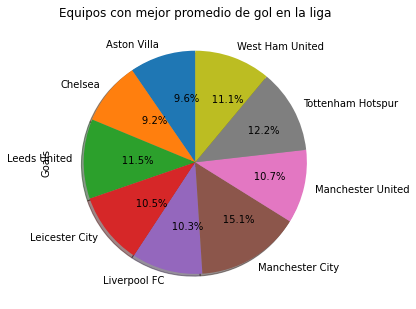

In [23]:
Goles['Goals'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%10.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Equipos con mejor promedio de gol en la liga')
plt.show()


6.2 Diagrama de barras

In [61]:
Posicion=pd.pivot_table(df, 
               index=['Club','Position'], 
               values='Goals', 
               aggfunc='sum',
               fill_value=0
              )
Posicion.head(18)

Goals
Club        Position       
Arsenal     DF            5
            FW           37
            FW,DF         5
            FW,MF         1
            GK            0
            MF            2
            MF,DF         1
            MF,FW         2
Aston Villa DF            5
            FW           33
            FW,MF         7
            GK            0
            MF            7
            MF,FW         0
Brighton    DF           11
            DF,MF         0
            FW            8
            FW,DF         0

In [62]:
Media_goles=pd.Series.mean(df['Goals'])

In [66]:
Golesd= Posicion[Posicion['Goals']>Media_goles]
Golesd.head()

Goals
Club    Position       
Arsenal DF            5
        FW           37
        FW,DF         5
        MF            2
        MF,FW         2

In [55]:
dfn=Posicion
dfn.head()

Position,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
Club,,,,,,,,,,
Arsenal,5,0,0,37,5,1,0,2,1,2
Aston Villa,5,0,0,33,0,7,0,7,0,0
Brighton,11,0,0,8,0,13,0,1,4,2
Burnley,5,0,0,18,0,1,0,8,0,0
Chelsea,15,0,0,16,2,6,0,7,0,10


In [ ]:
quiero que me muestre solamente un equipo con sus goles y sus posiciones

AttributeError: 'DataFrame' object has no attribute 'row'

# 7.- Conclusiones

In [71]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm
import plotly.express as px



df=pd.read_csv('datasets/antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


Text(0.5, 1.0, 'X')

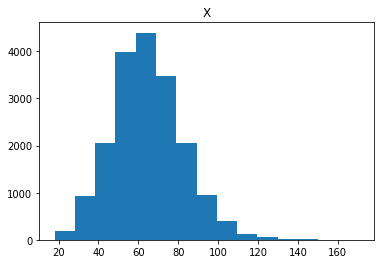

In [73]:
x=df['peso'].values
plt.hist(x = x, 
         bins = 15
        )
plt.title("X")

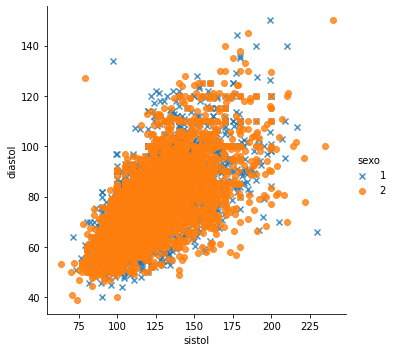

In [74]:
sns.lmplot(x='sistol', 
           y='diastol', 
           hue='sexo', 
           markers=['x', 'o'],
           fit_reg=False, 
           data=df)

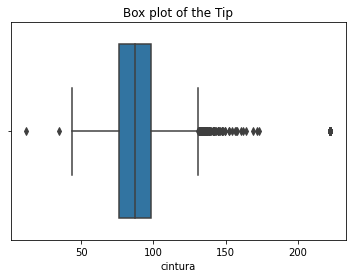

In [75]:
sns.boxplot(x = df["cintura"]).set_title("Box plot of the Tip")
plt.show()

In [ ]:
sns.lmplot(x='sistol', 
           y='diastol', 
           hue='sexo', 
           markers=['x', 'o'],
           fit_reg=False, 
           data=df)

In [ ]:
x=df['peso'].values
plt.hist(x = x, 
         bins = 15
        )
plt.title("X")

In [ ]:
x=df['peso'].values
plt.hist(x = x, 
         bins = 15,
         hue='sexo', 
         markers=['x', 'o'],
        )
plt.title("X")